# nhanes2

[nhanes2](https://wwwn.cdc.gov/Nchs/Nhanes/nhanes2/default.aspx): The second National Health and Nutrition Examination Survey

In [2]:
!pip install missingno  

In [1]:
!pip install rpy2     

  Using cached rpy2-3.5.13.tar.gz (218 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/341.8 kB ? eta -:--:--
     -------                                 61.4/341.8 kB 1.7 MB/s eta 0:00:01
     --------------------                   184.3/341.8 kB 2.2 MB/s eta 0:00:01
     ------------------------------         276.5/341.8 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 1.9 MB/s eta 0:00:00
  Created wheel for rpy2: filename=rpy2-3.5.13-py3-none-any.whl size=220527 sha256=c8527c1ed8a1077f0eca94dc908224d5e80a15560bbac32c776d36366f63c581
  Stored in directory: c:\users\hopio\appdata\local\pip\cache\wheels\d0\12\8e\a8e2ec40

In [2]:
import rpy2.robjects as robjects

In [3]:
import pandas as pd

## 결측치 시각화 라이브러리(missingno)를 사용하기 위해
# !pip install missingno  # 처음 라이브러리를 사용하는 사람만 해당
import missingno

import statsmodels.formula.api as smf   # 회귀분석에 필요한 라이브러리

## 파이썬에서 R 사용을 위한 모듈, rpy2
# !pip install rpy2            # 처음 라이브러리를 사용하는 사람만 해당
import rpy2.robjects as ro
# R과 파이썬 사이에 데이터를 전환하기 위한 필요한 라이브러리 호출
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri

In [2]:
df = pd.read_csv("nhanes2.csv")
df.head()

,age,bmi,hyp,chl
0,20-39,NaN,NaN,NaN
1,40-59,22.7,no,187.0
2,20-39,NaN,no,187.0
3,60-99,NaN,NaN,NaN
4,20-39,20.4,no,113.0


<AxesSubplot:>

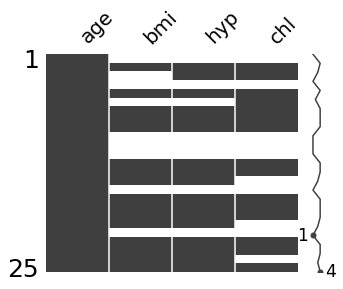

In [3]:
missingno.matrix(df, figsize=(5,4), fontsize=20)

## 결측치 단순제거

In [4]:
res1 = smf.ols(formula="bmi ~ age + hyp + chl", data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     4.055
Date:                Tue, 09 Mar 2021   Prob (F-statistic):             0.0438
Time:                        20:26:54   Log-Likelihood:                -30.551
No. Observations:                  13   AIC:                             71.10
Df Residuals:                       8   BIC:                             73.93
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.9630      4.268      3.506   

C:\Users\13Z970-G.AR30K\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


## MICE

In [5]:
# R에서 사용할 함수 정의
ro.r('''
mice_R <- function() {
    install.packages('mice')                          # R에서 다중 대체를 사용하기 위해 설치할 패키지 
    library(mice)                                     # 라이브러리 호출
    
    data(nhanes2)                                     # 내장 데이터 호출
    MICE = mice(nhanes2, print = FALSE, seed = 1)     # 복수 데이터 생성(default = 5), seed를 통해 같은 결과 출력
    fit = with(MICE, lm(bmi~age+hyp+chl))             # 각각에 대해서 분석수행(R에 내장된 데이터이기 때문에 바로 호출가능)  
    res = pool(fit)                                   # 통합하여 하나의 결과도출
    print(summary(res))                               # 결과물 출력      
    
                                                      # 생성된 복수의 데이터셋(1~5)과 추정치 결과를 반환
    return(list(complete(MICE,1), complete(MICE,2), complete(MICE,3), complete(MICE,4), complete(MICE,5), res$pooled))
    }
''')

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x0000026BE37E8AC8> [RTYPES.CLOSXP]
R classes: ('function',)

In [6]:
# 사용할 함수('mice_R') 호출
res = ro.globalenv['mice_R']()

R[write to console]: Installing package into 'C:/Users/13Z970-G.AR30K/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://cran.seoul.go.kr/bin/windows/contrib/4.0/mice_3.13.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2024912 bytes (1.9 MB)

R[write to console]: downloaded 1.9 MB




package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\13Z970-G.AR30K\AppData\Local\Temp\RtmpYVkyNH\downloaded_packages


R[write to console]: 
Attaching package: 'mice'


R[write to console]: The following object is masked from 'package:stats':

    filter


R[write to console]: The following objects are masked from 'package:base':

    cbind, rbind




         term    estimate  std.error statistic        df      p.value
1 (Intercept) 18.66788816 3.90652449  4.778644  9.360282 0.0008989516
2    age40-59 -4.66637582 2.57226734 -1.814110  4.274780 0.1392378647
3    age60-99 -6.55049039 2.91863326 -2.244369  4.372382 0.0824824605
4      hypyes  2.27386418 1.92812073  1.179316 10.902595 0.2633671041
5         chl  0.05312788 0.02359584  2.251578  6.622509 0.0611862472


In [7]:
## (1) 파이썬에서 불러온 데이터를 R에서 사용할 수 있도록 데이터 형태 변환 
# 1. with: 파이썬에서 파일을 열고, 닫을 때 사용하는 statement입니다.
# 2. localconverter: Rpy2에서 파일을 열 때, 사용하는 함수입니다.
# 3. pandas2ri.converter: 파일을 연 다음에, 데이터를 파이썬 또는 R에 맞게끔 형태를 교환해주는 함수입니다.
# 4. rpy2py(df) : 입력받은 데이터(df)를 R -> python으로 바꿔줍니다.

with localconverter(ro.default_converter + pandas2ri.converter):
    MI1 = ro.conversion.rpy2py(res[0])
    MI2 = ro.conversion.rpy2py(res[1])
    MI3 = ro.conversion.rpy2py(res[2])
    MI4 = ro.conversion.rpy2py(res[3])
    MI5 = ro.conversion.rpy2py(res[4])

In [8]:
# 생성된 첫번째 데이터셋: 모든 Nan값이 채워졌음을 확인 가능.
MI1.head()

,age,bmi,hyp,chl
1,20-39,25.5,no,187.0
2,40-59,22.7,no,187.0
3,20-39,28.7,no,187.0
4,60-99,22.5,yes,204.0
5,20-39,20.4,no,113.0


In [9]:
# 세 번째 관측값에 대해서, 실제 데이터(missing data)와 복수의 대체 데이터 값을 비교
ex3 = pd.concat([df.iloc[2], MI1.iloc[2], MI2.iloc[2],
                 MI3.iloc[2], MI4.iloc[2], MI5.iloc[2]], axis=1)
ex3.columns = ["missing data", "MICE1", "MICE2", "MICE3", "MICE4", "MICE5"]
ex3

,missing data,MICE1,MICE2,MICE3,MICE4,MICE5
age,20-39,20-39,20-39,20-39,20-39,20-39
bmi,NaN,28.7,27.2,29.6,27.2,29.6
hyp,no,no,no,no,no,no
chl,187.0,187.0,187.0,187.0,187.0,187.0


# 외부데이터: mice_example

In [10]:
df = pd.read_csv("mice_example.csv")
df.head(3)

,y1,y2,y3,y4
0,1.479633,2.150860,NaN,1.894212
1,NaN,1.141496,1.602530,-1.036947
2,0.708709,1.885673,1.250689,NaN


In [11]:
## (1) 파이썬에서 불러온 데이터를 R에서 사용할 수 있도록 데이터 형태 변환 
# 1. with: 파이썬에서 파일을 열고, 닫을 때 사용하는 statement입니다.
# 2. localconverter: Rpy2에서 파일을 열 때, 사용하는 함수입니다.
# 3. pandas2ri.converter: 파일을 연 다음에, 데이터를 파이썬 또는 R에 맞게끔 형태를 교환해주는 함수입니다.
# 4. py2rpy(df) : 입력받은 데이터(df)를 python -> R로 바꿔줍니다.

with localconverter(pandas2ri.converter):
    df_R = ro.conversion.py2rpy(df)

df_R

y1,y2,y3,y4
...,...,...,...


In [12]:
# [외부 데이터 사용] R에서 사용할 함수 정의
ro.r('''
mice_R <- function(df) {                 # 괄호 안에 input으로 받을 변수명을 저장
    library(mice)                        # 다중 대체를 위한 라이브러리 호출
    MICE = mice(df, print = FALSE)       # 복수의 데이터 생성 (default=5)
    fit1 = with(MICE, lm(y1~y2+y3+y4) )  # 각각에 대해서 분석수행
    print(summary(pool(fit1)))           # 통합하여 하나의 결과도출  
    # 생성된 복수(default = 5)의 데이터셋 반환
    return(list(complete(MICE, 1), complete(MICE, 2), complete(MICE, 3), complete(MICE, 4), complete(MICE, 5)))
    }
''')

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x0000026BE3842FC8> [RTYPES.CLOSXP]
R classes: ('function',)

In [13]:
# ro.globalenv를 통해서, 사용할 함수('mice_R')와 input(df_R)을 함께 호출함
MICE = ro.globalenv['mice_R'](df_R)

         term     estimate  std.error   statistic        df      p.value
1 (Intercept) -0.389940673 0.18639152 -2.09205161 10.171423 0.0624502257
2          y2  0.254075030 0.09898307  2.56685340  8.605088 0.0314172177
3          y3  0.486446890 0.07748285  6.27812323  9.729178 0.0001033172
4          y4 -0.006217464 0.06291119 -0.09882923 18.535657 0.9223348384
